# Name - Pranjal Sarkari

# Data Science & Business Analytics

# Task7 - Stock Market Prediction using Numerical and Textual Analysis

# Objective:

## In this task we will create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines. We have to  create a stock to analyze and predict - SENSEX (S&P BSE SENSEX)

## Importing all necessary libraries and dataset for this task.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.704819
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.358185
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.538239
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.121498
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.293579


# Exploring Rolling Mean and Return Rate of Stocks¶


## Rolling Mean

In [2]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.head(20)

Date
2009-12-31   NaN
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
2010-01-19   NaN
2010-01-20   NaN
2010-01-21   NaN
2010-01-22   NaN
2010-01-25   NaN
2010-01-26   NaN
2010-01-27   NaN
2010-01-28   NaN
2010-01-29   NaN
Name: Adj Close, dtype: float64

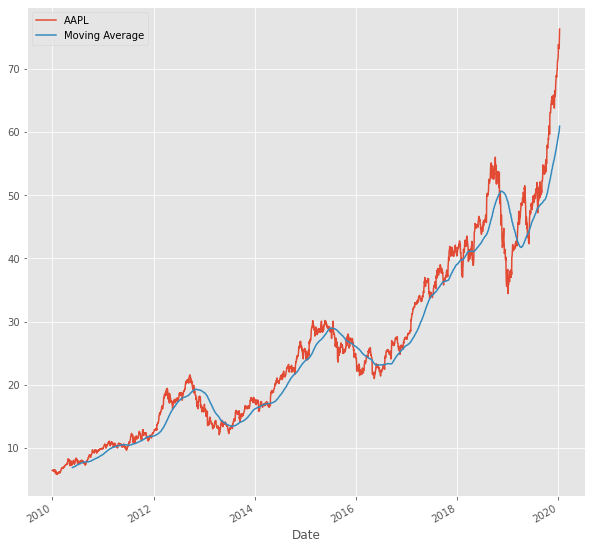

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(10, 10))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='Moving Average')
plt.legend()
plt.show()


## Return Deviation — For the  determination risk and return

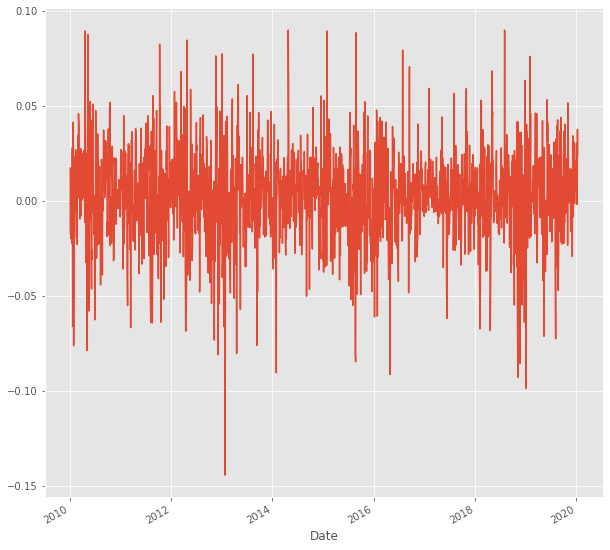

In [4]:
rets = close_px / close_px.shift(2) - 1
rets.plot(label='return')
plt.show()

## Analysing Competitors Stocks

In [5]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.head()

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,6.439648,10.615742,308.832428,91.085335,23.739305
2010-01-04,6.539882,10.840267,312.204773,92.163887,24.105360
2010-01-05,6.551187,10.896401,310.829926,91.050545,24.113148
2010-01-06,6.446983,10.840267,302.994293,90.459076,23.965164
2010-01-07,6.435065,11.401575,295.940735,90.145927,23.715933


## Analysis of Correlations (Dependency on one another)

In [6]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
retscomp.head(10)

Symbols,AAPL,GE,GOOG,IBM,MSFT
Date,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN
2010-01-04,0.015565,0.021150,0.010920,0.011841,0.015420
2010-01-05,0.001729,0.005178,-0.004404,-0.012080,0.000323
2010-01-06,-0.015906,-0.005152,-0.025209,-0.006496,-0.006137
2010-01-07,-0.001849,0.051780,-0.023280,-0.003462,-0.010400
2010-01-08,0.006648,0.021538,0.013331,0.010035,0.006897
2010-01-11,-0.008822,0.009639,-0.001512,-0.010470,-0.012720
2010-01-12,-0.011375,0.000597,-0.017684,0.007955,-0.006608
2010-01-13,0.014106,0.003578,-0.005741,-0.002145,0.009312


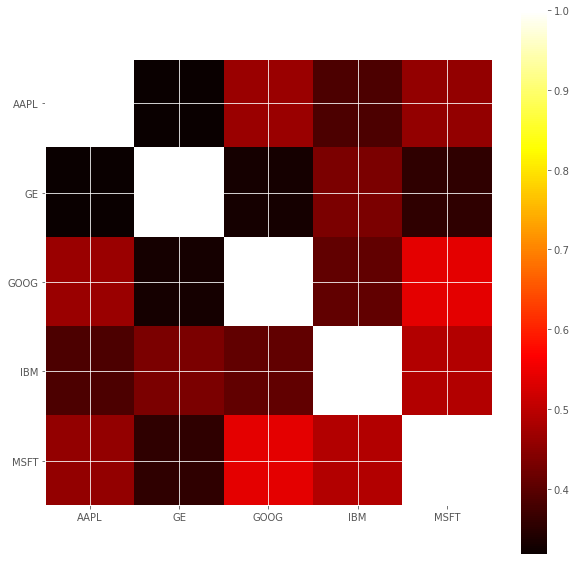

In [7]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

## Returns rate of Stock and Risk

Apart from correlation, we also analyse each stock’s risks and returns. In this case we are extracting the average of returns (Return Rate) and the standard deviation of returns (Risk).

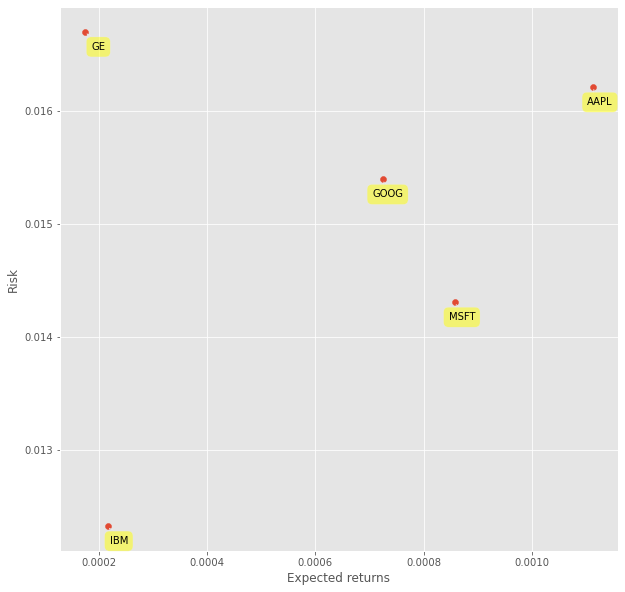

In [8]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

## Loading News data in textual form.

In [9]:
df1 = pd.read_csv('india-news-headlines.csv')
df1 = df1.iloc[0:10000]
df1.head(10)

,publish_date,headline_text
0,20010101,win over cena satisfying but defeating underta...
1,20010102,Status quo will not be disturbed at Ayodhya; s...
2,20010102,Fissures in Hurriyat over Pak visit
3,20010102,America's unwanted heading for India?
4,20010102,For bigwigs; it is destination Goa
5,20010102,Extra buses to clear tourist traffic
6,20010102,Dilute the power of transfers; says Riberio
7,20010102,Focus shifts to teaching of Hindi
8,20010102,IT will become compulsory in schools
9,20010102,Move to stop freedom fighters' pension flayed


In [10]:
df1.tail(10)


,publish_date,headline_text
9990,20010727,UTI to be split?
9991,20010727,Putin; Jiang talk Bush-Putin summit over hotline
9992,20010727,Phoolan's village wants ticket for her kin
9993,20010727,McCartney and girlfriend Heather Mills to marry
9994,20010727,Rachel Shelley has first 15 minutes of fame
9995,20010727,For Sensex; worst is yet to come
9996,20010727,Dilemma: To charge somebody with corruption or...
9997,20010727,UP Govt was awaiting Phoolan's nod for commando
9998,20010727,Phoolan's decade in Gwalior Jail changed her
9999,20010727,Implement Kannada or else; DC warns officials


## Information of dataset

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   publish_date   10000 non-null  int64 
 1   headline_text  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


## Description of Dataset

In [14]:
df1.describe()


,publish_date
count,1.000000e+04
mean,2.001050e+07
std,2.169321e+02
min,2.001010e+07
25%,2.001032e+07
50%,2.001053e+07
75%,2.001072e+07
max,2.001073e+07


In [16]:
df1.max()

publish_date                                              20010727
headline_text    win over cena satisfying but defeating underta...
dtype: object

In [17]:
df1['headline_text'].unique()

array(['win over cena satisfying but defeating undertaker bigger roman reigns',
       'Status quo will not be disturbed at Ayodhya; says Vajpayee',
       'Fissures in Hurriyat over Pak visit', ...,
       "UP Govt was awaiting Phoolan's nod for commando",
       "Phoolan's decade in Gwalior Jail changed her",
       'Implement Kannada or else; DC warns officials'], dtype=object)

In [18]:
df1.isna().any()

publish_date     False
headline_text    False
dtype: bool

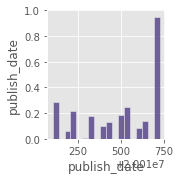

In [19]:
sns.set_palette('viridis')
sns.pairplot(df1)
plt.show()

In [21]:
df1['headline_text'].value_counts()

Bush names Lindsey top economic aide                8
Light combat craft takes India into club class      7
Indian American boy confesses to parents' murder    5
Bangla Oppn leader issues 'fatwa' against judges    5
Shah Rukh wins them over                            4
                                                   ..
Looking for Digs                                    1
Riot after Riot                                     1
Crime nexus hits Jagaddal peace                     1
Not Apna Budget                                     1
Napster stirs...ever so silently                    1
Name: headline_text, Length: 8873, dtype: int64

## EDA using NLP & NLTK tools

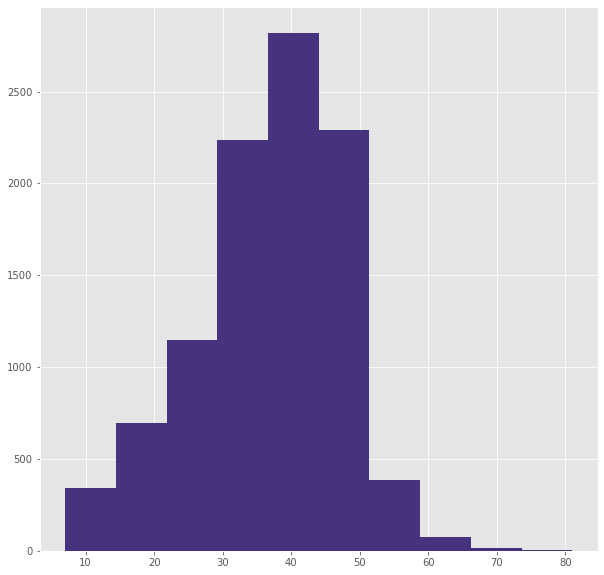

In [22]:
df1['headline_text'].str.len().hist()
plt.show()

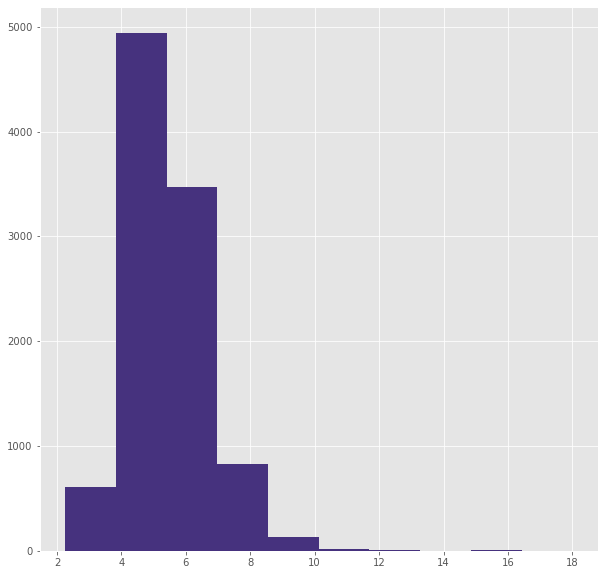

In [24]:
df1['headline_text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
plt.show()

In [25]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
corpus=[]
new= df1['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

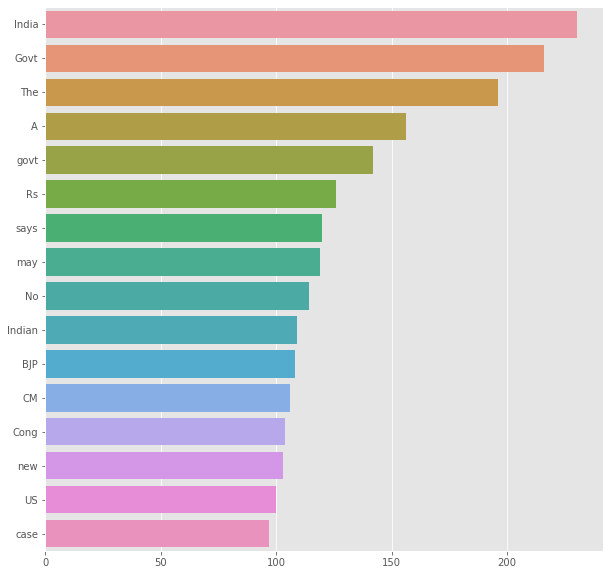

In [27]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.show()

## Ngram exploration

In [28]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

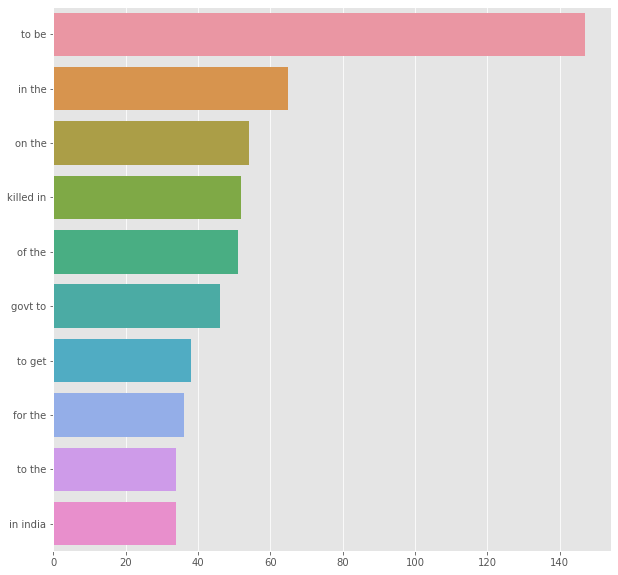

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(df1['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.show()

## Using Textblob

In [30]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

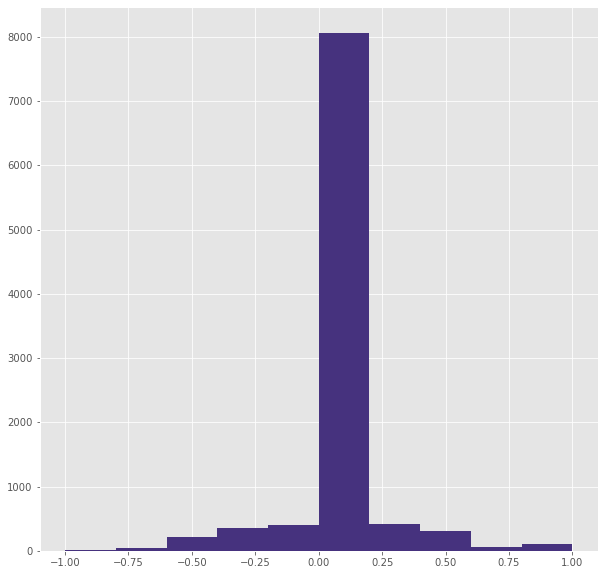

In [31]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df1['polarity_score']=df1['headline_text'].\
   apply(lambda x : polarity(x))
df1['polarity_score'].hist()
plt.show()

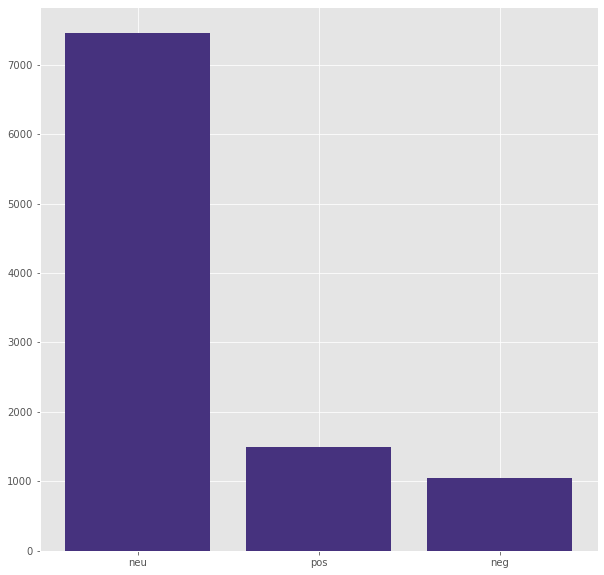

In [32]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
df1['polarity']=df1['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(df1.polarity.value_counts().index,
        df1.polarity.value_counts())
plt.show()

In [33]:
df1[df1['polarity']=='pos']['headline_text'].head()

0     win over cena satisfying but defeating underta...
5                  Extra buses to clear tourist traffic
13          Will Qureshi's return really help the govt?
31                 Extra buses to clear tourist traffic
39          Will Qureshi's return really help the govt?
Name: headline_text, dtype: object

In [34]:
df1[df1['polarity']=='neg']['headline_text'].head()

66         Destroying myths and doubts on sexuality
87         Powerless north India gropes in the dark
105                        10-year-old girl missing
132              Net lottery: A winner or a sucker?
143    Mental illness can pass from parent to child
Name: headline_text, dtype: object